In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
598,ham,Will do. Was exhausted on train this morning. ...,NaN,NaN,NaN
904,ham,"We're all getting worried over here, derek and...",NaN,NaN,NaN
2283,ham,I reach home safe n sound liao...,NaN,NaN,NaN
4701,ham,Anytime...,NaN,NaN,NaN
4493,ham,Man this bus is so so so slow. I think you're ...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

#Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#dropping the last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [ ]:
df.sample(3)

,v1,v2
4051,ham,"Ya ok, then had dinner?"
3524,ham,I not free today i haf 2 pick my parents up to...
1277,ham,Dont put your phone on silent mode ok


In [ ]:
#renaming the columns
df.rename(columns={'v1': 'spam/ham', 'v2': 'text'},inplace=True)
df.sample(3)

,spam/ham,text
4666,ham,I send the print outs da.
2646,ham,"Em, its olowoyey@ usc.edu have a great time in..."
846,ham,My stomach has been thru so much trauma I swea...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['spam/ham']=encoder.fit_transform(df['spam/ham'])
df.head(4)

,spam/ham,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [ ]:
#missing value
df.isnull().sum()

,0
spam/ham,0
text,0


In [ ]:
#checking duplicates values
df.duplicated().sum()

403

In [ ]:
#dropping the duplicated values
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

#EDA

In [ ]:
df['spam/ham'].value_counts()

,count
spam/ham,
0,4516
1,653


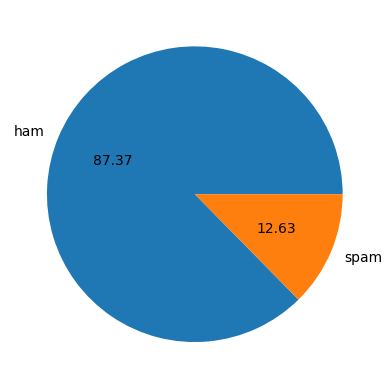

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['spam/ham'].value_counts(),labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [ ]:
#data is imbalanced

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df.head(3)

,spam/ham,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [ ]:
# number of words in the text
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head(2)

,spam/ham,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [ ]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,spam/ham,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.describe()

,spam/ham,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
#for ham messages
df[df['spam/ham']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for spam messages
df[df['spam/ham']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

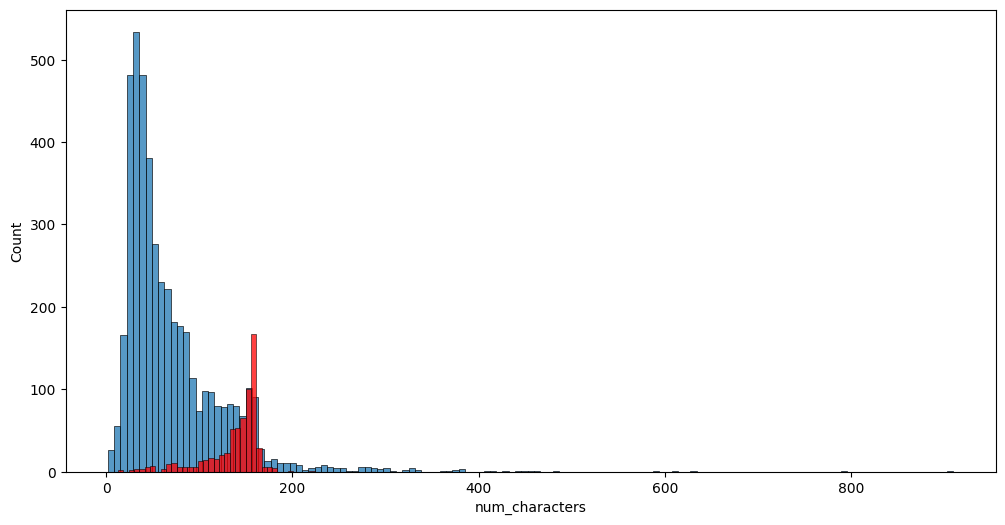

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam/ham']==0]['num_characters'])
sns.histplot(df[df['spam/ham']==1]['num_characters'], color='red')

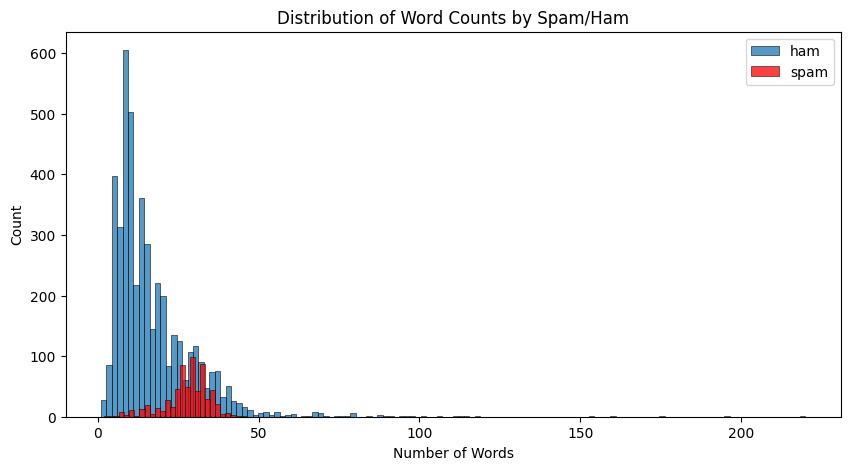

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['spam/ham']==0]['num_words'], label= 'ham')
sns.histplot(df[df['spam/ham']==1]['num_words'], color= 'red', label= 'spam')

plt.legend()
plt.title('Distribution of Word Counts by Spam/Ham')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

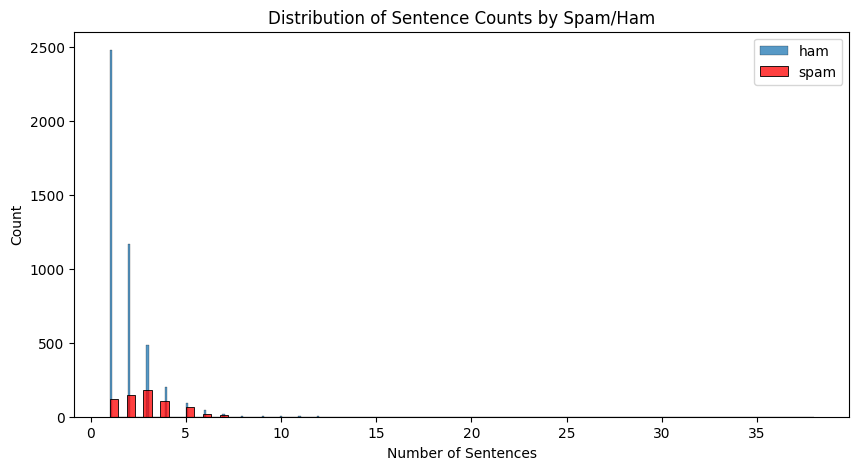

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['spam/ham']==0]['num_sentences'], label= 'ham')
sns.histplot(df[df['spam/ham']==1]['num_sentences'], color= 'red', label= 'spam')

plt.legend()
plt.title('Distribution of Sentence Counts by Spam/Ham')
plt.xlabel('Number of Sentences')
plt.ylabel('Count')
plt.show()

In [ ]:
df.head()

,spam/ham,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

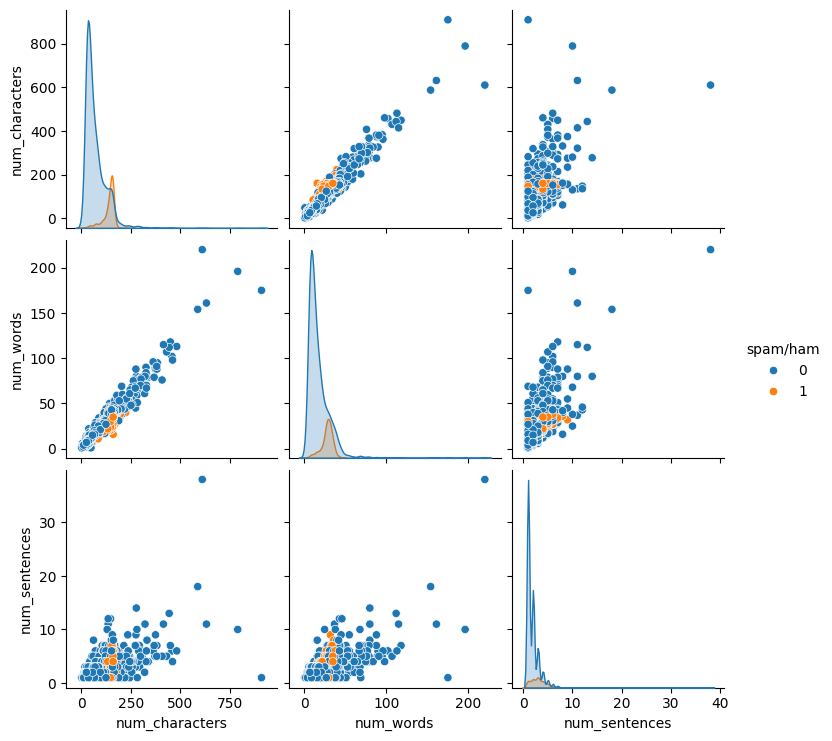

In [ ]:
sns.pairplot(df, hue='spam/ham')

<Axes: >

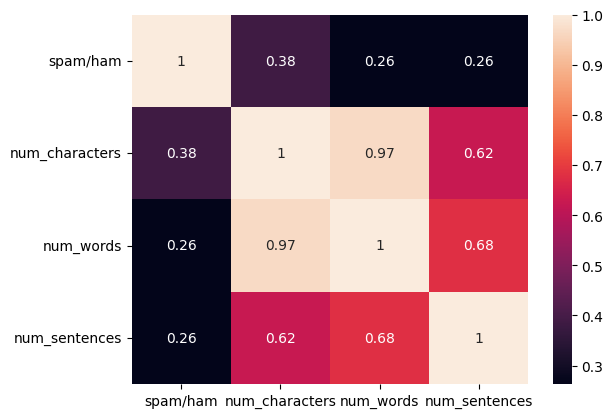

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

##Data Preprocessing


*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stopwords and punctuation
*   Stemming







In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string
#stopwords.words('english)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [ ]:
def transform_text(text):
  text= text.lower()
  text= nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text= y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
transform_text('Hey, this IS 67pernsdf ^&*. And I love the channel you TAlked abut!!!')

'hey 67pernsdf love channel talk abut'

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)
df.head(3)

,spam/ham,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [ ]:
#generating a word cloud
from wordcloud import WordCloud
wc= WordCloud(width=600, height=600, min_font_size=10, background_color='white')

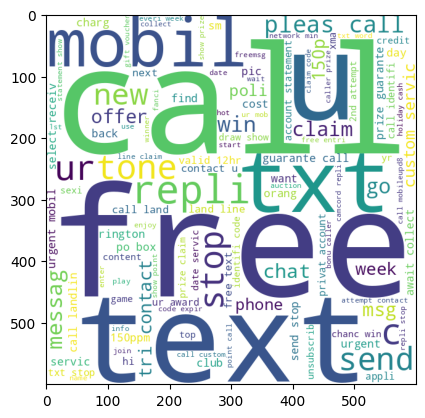

In [ ]:
spam_wc= wc.generate(df[df['spam/ham']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

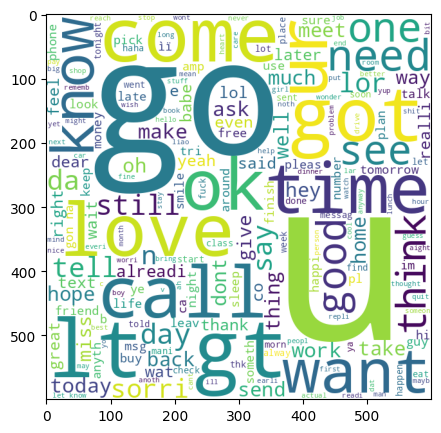

In [ ]:
ham_wc= wc.generate(df[df['spam/ham']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)

In [ ]:
#top 30 words in spam
spam_corpus=[]
for msg in df[df['spam/ham']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

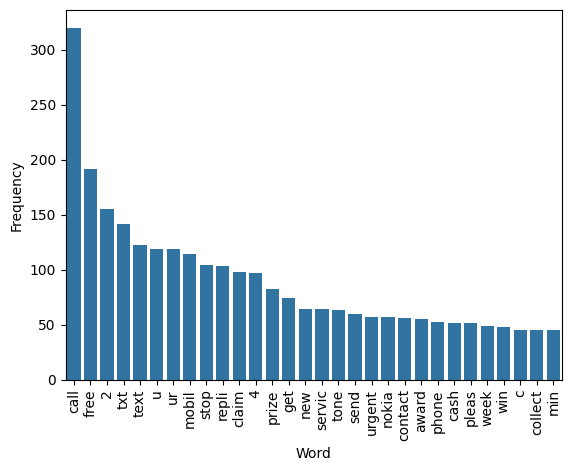

In [ ]:
from collections import Counter
spam_df= pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

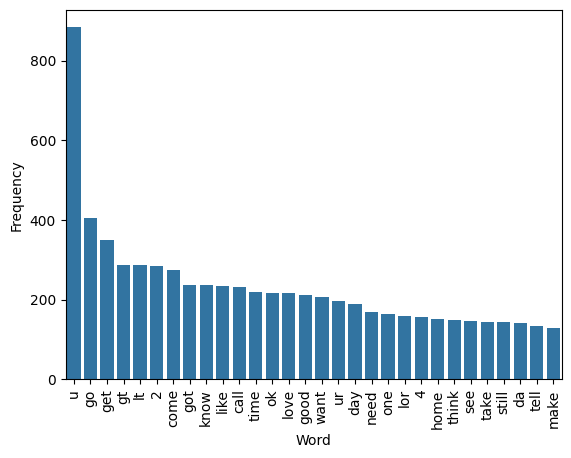

In [ ]:
ham_corpus=[]
for msg in df[df['spam/ham']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

from collections import Counter
ham_df=pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=ham_df)
plt.xticks(rotation='vertical')
plt.show()

#Model Building

In [74]:
#bag of words --> countvectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [75]:
# X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [103]:
X.shape #sms,words

(5169, 3000)

In [104]:
y=df['spam/ham'].values

In [105]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state =42, test_size=0.2)

In [107]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [108]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [109]:
gnb.fit(X_train, y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8588007736943907
[[765 124]
 [ 22 123]]
0.4979757085020243


In [110]:
mnb.fit(X_train, y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9777562862669246
[[883   6]
 [ 17 128]]
0.9552238805970149


In [111]:
bnb.fit(X_train, y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [112]:
#tfidf --> mnb


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [114]:
lg = LogisticRegression(solver='liblinear', penalty='l1')
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state= 2)
abc = AdaBoostClassifier(n_estimators=50, random_state= 2)
bc = BaggingClassifier(n_estimators=50, random_state= 2)
etc = ExtraTreesClassifier(n_estimators=50, random_state= 2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state= 2)
dtc = DecisionTreeClassifier(max_depth=5)
mnb = MultinomialNB()
xgb = XGBClassifier(n_estimators=50, random_state= 2)
svc = SVC(kernel='sigmoid', gamma= 1.0)

#here hyperparameter training is basic

In [115]:
clfs={'LG':lg,
      'KNN':knn,
      'RFC':rfc,
      'ABC':abc,
      'BC':bc,
      'ETC':etc,
      'GBC':gbc,
      'DTC':dtc,
      'MNB':mnb,
      'XGB':xgb,
      'SVC':svc}

In [116]:
# Function to train the classifier and return accuracy and precision
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict the test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # 'macro' to handle multi-class

    return accuracy, precision

In [117]:
# Lists to store the accuracy and precision for each classifier
accuracy_scores = []
precision_scores = []

# Loop over each classifier, train it, and print results
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(f'For {name}:')
    print(f'Accuracy: {current_accuracy}')
    print(f'Precision: {current_precision}')

    # Append the results to the lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For LG:
Accuracy: 0.9622823984526112
Precision: 0.9443482973218655
For KNN:
Accuracy: 0.9061895551257253
Precision: 0.9508113590263692
For RFC:
Accuracy: 0.971953578336557
Precision: 0.9734505320678746


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For ABC:
Accuracy: 0.9506769825918762
Precision: 0.9148299530905077
For BC:
Accuracy: 0.9622823984526112
Precision: 0.929194164078675
For ETC:
Accuracy: 0.9777562862669246
Precision: 0.9804996154115097
For GBC:
Accuracy: 0.9468085106382979
Precision: 0.9566564498933903
For DTC:
Accuracy: 0.9342359767891683
Precision: 0.8907318919430383
For MNB:
Accuracy: 0.9777562862669246
Precision: 0.968167495854063
For XGB:
Accuracy: 0.9680851063829787
Precision: 0.9549530905077263
For SVC:
Accuracy: 0.9709864603481625
Precision: 0.946778666452313


In [118]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(), 'Precision':precision_scores, 'Accuracy':accuracy_scores}).sort_values(by='Precision',ascending=False)

In [119]:
performance_df

,Algorithm,Precision,Accuracy
5,ETC,0.980500,0.977756
2,RFC,0.973451,0.971954
8,MNB,0.968167,0.977756
6,GBC,0.956656,0.946809
9,XGB,0.954953,0.968085
1,KNN,0.950811,0.906190
10,SVC,0.946779,0.970986
0,LG,0.944348,0.962282
4,BC,0.929194,0.962282
3,ABC,0.914830,0.950677


In [120]:
performance_df1=pd.melt(performance_df, id_vars='Algorithm')

In [121]:
performance_df1

,Algorithm,variable,value
0,ETC,Precision,0.980500
1,RFC,Precision,0.973451
2,MNB,Precision,0.968167
3,GBC,Precision,0.956656
4,XGB,Precision,0.954953
5,KNN,Precision,0.950811
6,SVC,Precision,0.946779
7,LG,Precision,0.944348
8,BC,Precision,0.929194
9,ABC,Precision,0.914830


In [122]:
#model improvement
#changing the max-features of tfidf
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_score, 'Precision_max_ft_3000':precision_score})
# performance_df.merge(temp_df,on='Algorithm')

In [ ]:
#voting classifier
svc=SVC(kernel='sigmoid')